## Week 1 - Applied Machine Learning Classifier

### Import Libraries

In [6]:
%matplotlib notebook

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

fruits = pd.read_table('fruit_data_with_colors.txt')

In [19]:
lookup_fruit_name = dict(zip(fruits.fruit_label.unique(), fruits.fruit_name.unique()))

In [29]:
X = fruits[['mass', 'width', 'height', 'color_score']]
y = fruits['fruit_label']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### Data Exploration

In [27]:
from matplotlib import cm
cmap = cm.get_cmap('gnuplot')

scatter = pd.scatter_matrix?

<IPython.core.display.Javascript object>


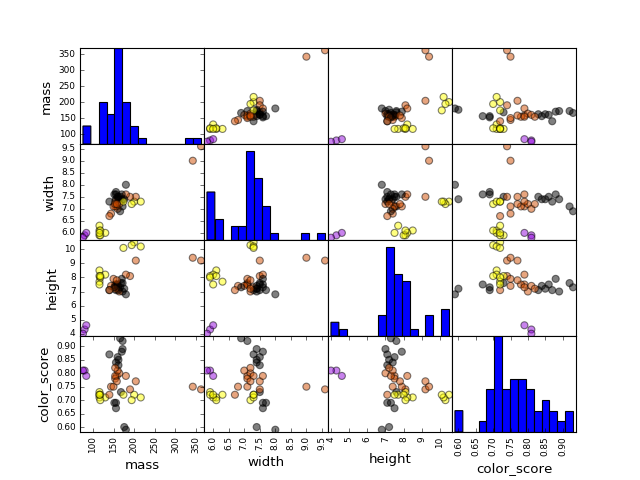

In [34]:
scatter = pd.scatter_matrix(X_train, c=y_train, marker="o", s=40, cmap=cmap, hist_kwds={'bins': 15})

<IPython.core.display.Javascript object>


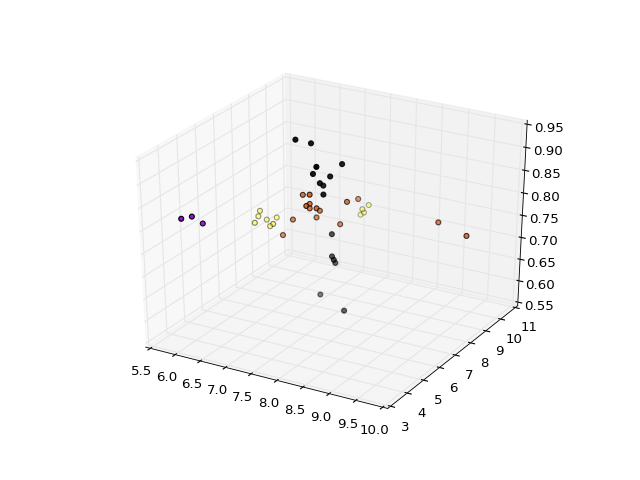

In [47]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()

ax= fig.add_subplot(111, projection="3d")
ax.scatter(X_train['width'], X_train['height'], X_train['color_score'], c= y_train, marker="o", cmap=cmap)
plt.show()

### Training a k-NN classifier

In [50]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier?


In [55]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
predicted_values = knn.predict(X_test)
knn.score(X_test, y_test)

0.53333333333333333

<IPython.core.display.Javascript object>


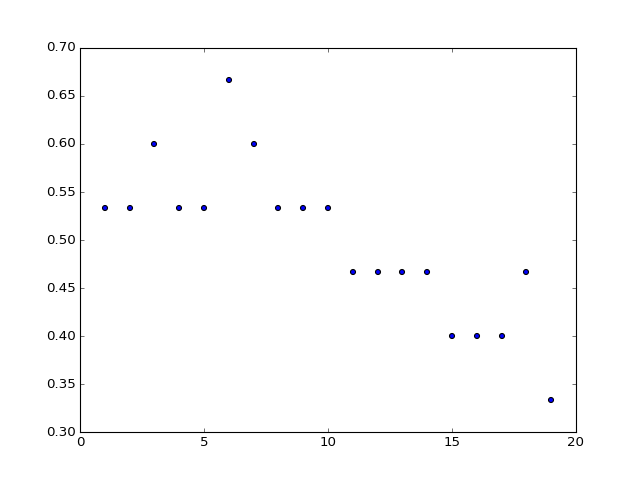

In [59]:
k_range = range(1,20)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    k_score = knn.score(X_test, y_test)
    scores.append(k_score)
    
plt.figure()
plt.scatter(k_range, scores)
plt.show()